## Plotting Sigmoid Function

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

Sw,b(x)= 1/(1+e^(-(wx+b)))

In [2]:
def sigmoid(x,w,b):
    return 1.0/(1.0+np.exp(-(np.dot(w,x)+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

In [4]:
w=0.9
b=0.1
X=np.linspace(-10,10,100)

In [5]:
Y= sigmoid(X,w,b)

In [6]:
w=0.6
b=0.1
X=np.linspace(-10,10,100)
Z=sigmoid(X,w,b)

In [7]:
w=-0.6
b=0.1
T=sigmoid(X,w,b)

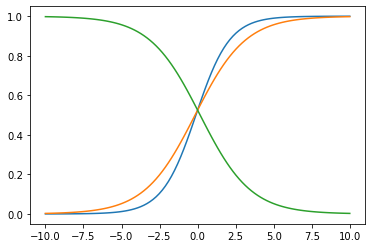

In [8]:
plt.plot(X,Y)
plt.plot(X,Z)
plt.plot(X,T)
plt.show()

for two variables and features

S(x1,x2)for w,b = 1/(1+e^-(w1*x1+w2*x2+b))

In [9]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1.0/(1.0+np.exp(-(x1*w1+x2*w2+b)))

In [10]:
sigmoid_2d(1,1,1,1,1)

0.9525741268224334

In [11]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [12]:
from mpl_toolkits import mplot3d

In [13]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,80)
XX1,XX2=np.meshgrid(X1,X2)

In [14]:
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [15]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

In [16]:
Y

array([[4.53978687e-05, 5.02228667e-05, 5.55606489e-05, ...,
        4.49666020e-01, 4.74768924e-01, 5.00000000e-01],
       [5.15236699e-05, 5.69996961e-05, 6.30576873e-05, ...,
        4.81149458e-01, 5.06392696e-01, 5.31603382e-01],
       [5.84760131e-05, 6.46908987e-05, 7.15662610e-05, ...,
        5.12783302e-01, 5.37965398e-01, 5.62955252e-01],
       ...,
       [4.37044748e-01, 4.62034602e-01, 4.87216698e-01, ...,
        9.99928434e-01, 9.99935309e-01, 9.99941524e-01],
       [4.68396618e-01, 4.93607304e-01, 5.18850542e-01, ...,
        9.99936942e-01, 9.99943000e-01, 9.99948476e-01],
       [5.00000000e-01, 5.25231076e-01, 5.50333980e-01, ...,
        9.99944439e-01, 9.99949777e-01, 9.99954602e-01]])

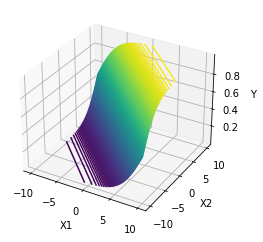

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');

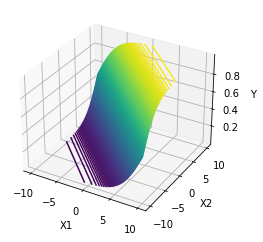

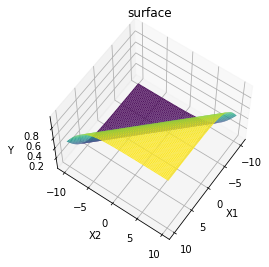

In [18]:
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(60, 35)
fig

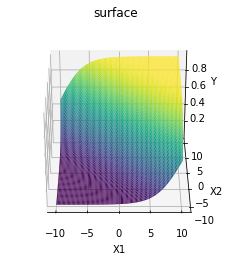

In [19]:
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(30, 270)

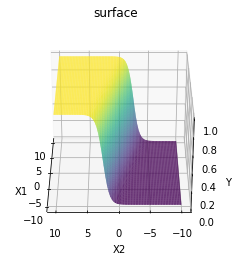

In [20]:
w1=0.5
w2=2
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(30, 180)

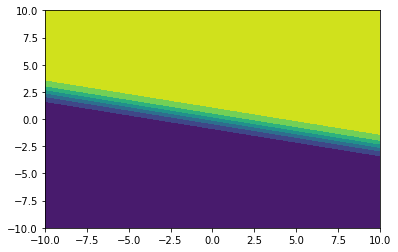

In [21]:
plt.contourf(XX1,XX2,Y)
plt.show()

In [22]:
import matplotlib.colors
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

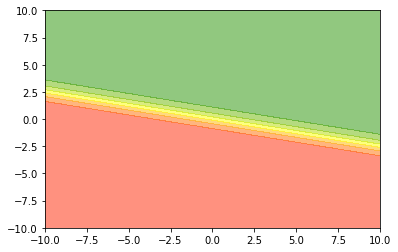

In [23]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.5)
plt.show()

## Compute Loss for given dataset

In [24]:
X= np.random.random(25)*20-10

In [25]:
w_unknown=0.5
b_unknown=0.25
Y=sigmoid(X,w_unknown,b_unknown)

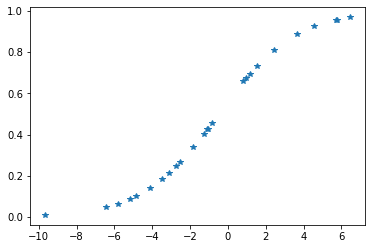

In [26]:
plt.plot(X,Y,'*')
plt.show()

In [27]:
def calculate_loss(X,Y,w_est,b_est):
    loss =0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
    return loss

In [28]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)

In [29]:
WW.shape

(100, 100)

In [30]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

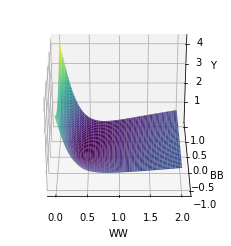

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('WW')
ax.set_ylabel('BB')
ax.set_zlabel('Y');

ax.view_init(30,270)

In [32]:
ij=np.argmin(Loss)

In [33]:
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [34]:
print(i,j)

62 25


In [35]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


## Class for Sigmoid Neuron

In [242]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*(y_pred)*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1, initialise=True,display_loss=False):
        
        #initialise w,b
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        
        if display_loss:
            loss={}
        
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            
            self.w-=learning_rate*dw
            self.b-=learning_rate*db
            
            if display_loss:
                Y_pred=self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(Y_pred,Y)
        
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred=self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def pred_and_cal_loss(self,X,Y):
        Loss=0
        for x,y in zip(X,Y):
            y_pred=self.sigmoid(self.perceptron(x))
            Loss+=np.power((y-y_pred),2)
        return np.power(Loss,1/2)

In [185]:
# Fit for toy data
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,4],[1,5]])
Y=[1,1,1,0,0,0]

In [186]:
sn=SigmoidNeuron()

In [187]:
sn.fit(X,Y,1,0.25,True)

In [40]:
sn.w

array([[-0.26345212,  1.55773945]])

In [41]:
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val=np.asarray([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.perceptron(val))
    
    ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    ax.plot()

[[0.23876524 0.21136796]] [-0.00466619]
[[ 0.96888293 -1.211566  ]] [-0.08215685]
[[ 1.24704373 -0.93408744]] [0.02888086]
[[ 1.36931431 -0.81526288]] [0.07724803]
[[ 1.42018425 -0.77751637]] [0.09565606]
[[ 1.45304261 -0.7651498 ]] [0.10577494]
[[ 1.47830269 -0.76434659]] [0.11226633]
[[ 1.49980894 -0.76877705]] [0.11703374]
[[ 1.51920727 -0.77545342]] [0.12093393]
[[ 1.53724915 -0.78300643]] [0.12435932]
[[ 1.55430195 -0.79081646]] [0.12749468]
[[ 1.57056179 -0.79860416]] [0.13043124]
[[ 1.58614485 -0.8062454 ]] [0.13321705]
[[ 1.60112781 -0.81368787]] [0.1358795]
[[ 1.61556641 -0.82091301]] [0.13843565]
[[ 1.62950441 -0.82791821]] [0.14089715]
[[ 1.64297806 -0.83470834]] [0.1432726]
[[ 1.65601854 -0.84129164]] [0.1455688]
[[ 1.66865328 -0.84767762]] [0.14779138]
[[ 1.68090682 -0.85387609]] [0.14994519]


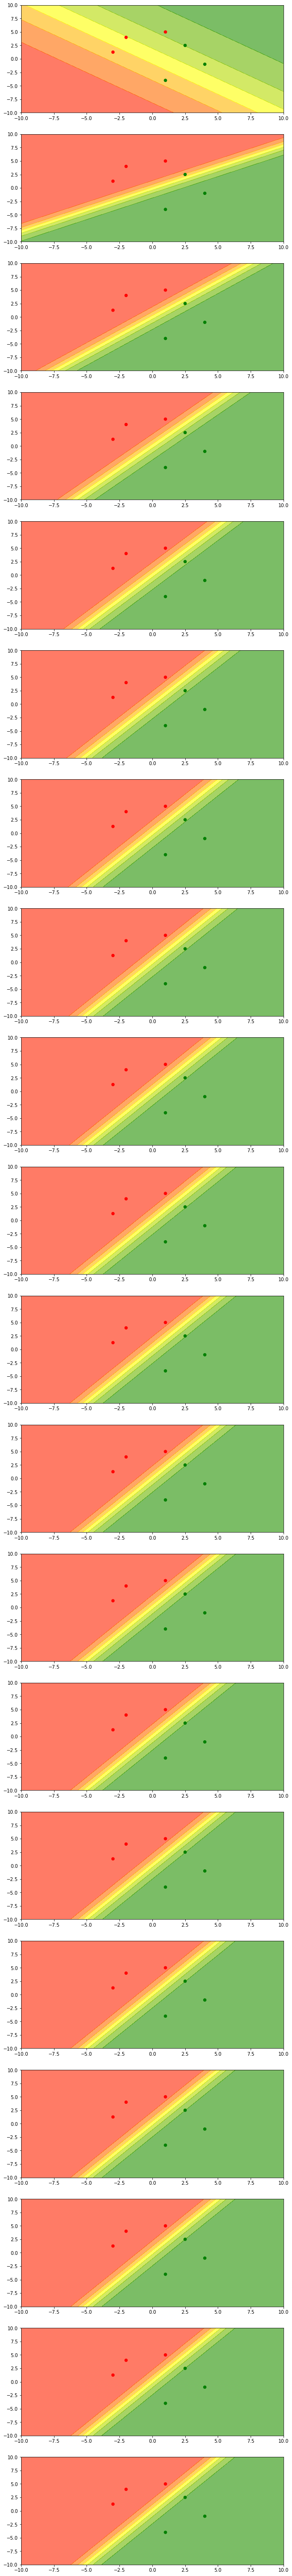

In [42]:
sn.fit(X,Y,1,0.05,True)
N=20
plt.figure(figsize=(10,N*5))
for i in range(20):
    print(sn.w,sn.b)
    #print(sn.pred_and_cal_loss(X,Y))
    ax=plt.subplot(N,1,i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.75,False)

## Load Data

In [193]:
import pandas as pd

In [194]:
df=pd.read_csv('mobile_cleaned-2.csv')

In [195]:
df.shape

(341, 88)

In [196]:
X=df.drop('Rating',axis=1)

In [197]:
Y=df['Rating'].values

In [198]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [199]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [200]:
threshold=4.2
df['Class']=(df['Rating']>= threshold).astype(np.int)

/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [201]:
df['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [202]:
Y_binarised=df['Class'].values

In [203]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## Standardizing 

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
sc=StandardScaler()

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [208]:
print(X_train.shape)

(255, 87)


In [209]:
X_test.shape

(86, 87)

In [210]:
X_scaled_train=sc.fit_transform(X_train)
X_scaled_test=sc.transform(X_test)

In [211]:
from sklearn.preprocessing import MinMaxScaler

In [212]:
mn=MinMaxScaler()

In [213]:
y_scaled_train=mn.fit_transform(y_train.reshape(-1,1))

In [214]:
y_scaled_test=mn.transform(y_test.reshape(-1,1))

In [215]:
scaled_threshold=list(mn.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [216]:
scaled_threshold

0.6800000000000002

In [217]:
y_binarised_train=(y_scaled_train>scaled_threshold).astype(np.int).ravel()

/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [218]:
y_binarised_test=(y_scaled_test>scaled_threshold).astype(np.int).ravel()

/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [243]:
sn=SigmoidNeuron()

/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2000 [00:00<?, ?epoch/s]

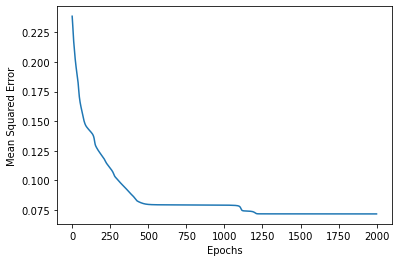

In [244]:
sn.fit(X_scaled_train,y_scaled_train,epochs=2000,learning_rate=0.015,display_loss=True)

In [245]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [246]:
y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype(np.int).ravel()
y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype(np.int).ravel()

/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/Users/karveandhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

In [247]:
from sklearn.metrics import accuracy_score

In [248]:
accuracy_train=accuracy_score(y_pred_binarised_train,y_binarised_train)

In [249]:
accuracy_test=accuracy_score(y_pred_binarised_test,y_binarised_test)

In [250]:
accuracy_train

0.7764705882352941

In [251]:
accuracy_test

0.7441860465116279